In [27]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from xgboost.sklearn import XGBRegressor
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet

In [28]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'MSLE': metrics.mean_squared_log_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [29]:
## example = test the model
y = [2,4,6,8,10]
y_hat = [2,3,4,5,30]

In [30]:
regressionMetrics(y, y_hat)

{'MSE': 82.8,
 'RMSE': 9.09945053286186,
 'MAE': 5.2,
 'MSLE': 0.28017901106191967,
 'RMSLE': 0.5293193847403661}

In [31]:
df = pd.read_csv (r'C:\Users\elira\DataScience\projects\project_DB_recruit_restaurant_visitor_forecasting\Final\test_dev_train\train_data.csv')
df.describe()

,max_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000
mean,35.033002,20.649248,6.507077,289.326509,144.707417
std,22.058590,12.636614,3.597102,355.811326,177.932968
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,11.000000,6.000000,128.000000,65.000000
50%,31.000000,18.000000,6.000000,224.000000,112.000000
75%,47.000000,28.000000,7.000000,368.000000,184.000000
max,675.000000,174.000000,97.000000,23338.000000,11669.000000


In [32]:
X = df.drop(['sum_visitors'],axis=1).values # independant features
y = df['sum_visitors']                     # dependant variable

In [33]:
models_list = pd.DataFrame()

### Linear Regression

In [34]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)

In [35]:
regressionMetrics(y, pred1)

{'MSE': 7.464963316737358,
 'RMSE': 2.7322085053555774,
 'MAE': 0.16510348852820828,
 'MSLE': 0.000796891627317003,
 'RMSLE': 0.028229268983043166}

In [36]:
model_dict = {'model': "LinearRegression"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred1)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

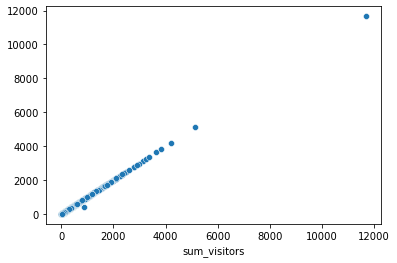

In [37]:
sns.scatterplot(y, pred1)

### Decision Tree

In [38]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [39]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred2)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

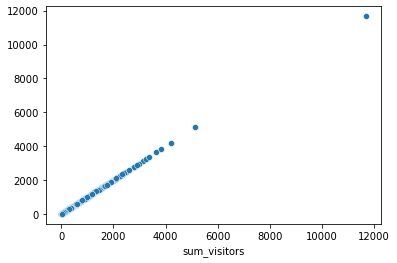

In [40]:
sns.scatterplot(y, pred2)

### Random Forest

In [41]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [42]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred3)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

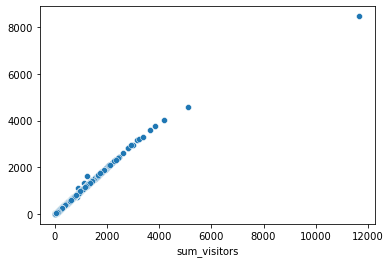

In [43]:
sns.scatterplot(y, pred3)

### Adaptive Boosting (ADABoost)

In [44]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [45]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred4)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

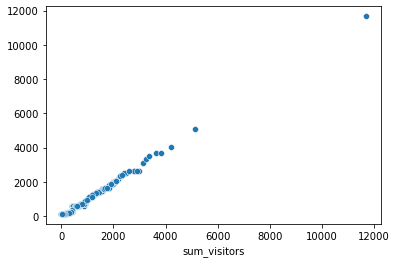

In [46]:
sns.scatterplot(y, pred4)

### Gradient Boosting Machine (GBM)

In [47]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [48]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred5)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

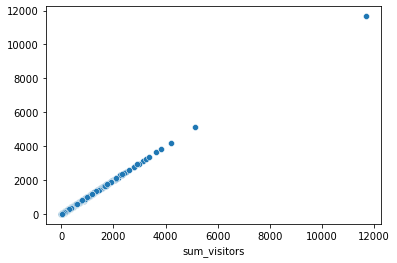

In [49]:
sns.scatterplot(y, pred5)

### Support Vector Machine (SVM)

In [50]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [51]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVR"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred6)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

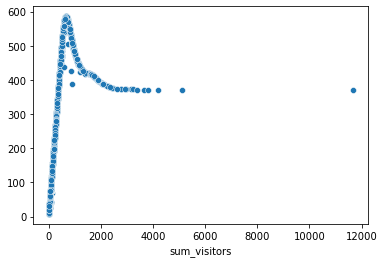

In [52]:
sns.scatterplot(y, pred6)

# Ridge

In [53]:
mod7 = RidgeClassifier()
mod7.fit(X,y)

RidgeClassifier()

In [54]:
pred7 = mod7.predict(X)
model_dict = {'model': "Ridge"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred7)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

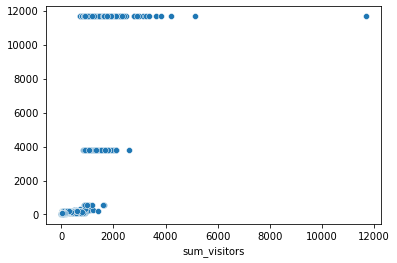

In [55]:
sns.scatterplot(y, pred7)

# Stochastic Gradient Descent Regression = SGD

In [56]:
mod8 = SGDClassifier()
mod8.fit(X,y)

SGDClassifier()

In [57]:
pred8 = mod8.predict(X)
model_dict = {'model': "SGD"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred8)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge
7,87.246609,32527.493699,0.762386,180.353801,0.873147,SGD


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

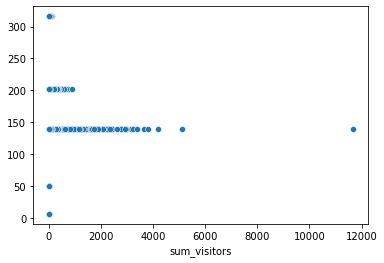

In [58]:
sns.scatterplot(y, pred8)

# Elastic Net 

In [69]:
mod9 = ElasticNet(alpha=1.0, l1_ratio=0.5)
mod9.fit(X,y)

ElasticNet()

In [70]:
pred9 = mod9.predict(X)
model_dict = {'model': "Elastic-Net"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred9)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge
7,87.246609,32527.493699,0.762386,180.353801,0.873147,SGD
8,0.110054,7.481537,0.000761,2.735240,0.027588,Elastic-Net
9,0.165081,7.464963,0.000797,2.732209,0.028228,BayesianRidge


C:\Users\elira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_visitors'>

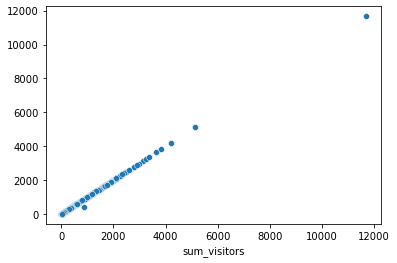

In [71]:
sns.scatterplot(y, pred9)

In [72]:
mod10 = linear_model.BayesianRidge()
mod10.fit(X,y)

BayesianRidge()

In [73]:
pred10 = mod10.predict(X)
model_dict = {'model': "BayesianRidge"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred10)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge
7,87.246609,32527.493699,0.762386,180.353801,0.873147,SGD
8,0.110054,7.481537,0.000761,2.735240,0.027588,Elastic-Net
9,0.165081,7.464963,0.000797,2.732209,0.028228,BayesianRidge


## Model Selection

In [64]:
Mean Absolute Error - we will follow this metric
models_list.sort_values('MAE')

,MAE,MSE,MSLE,RMSE,RMSLE,model
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
8,0.110054,7.481537,0.000761,2.735240,0.027588,Elastic-Net
9,0.165081,7.464963,0.000797,2.732209,0.028228,BayesianRidge
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
7,87.246609,32527.493699,0.762386,180.353801,0.873147,SGD
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge


In [65]:
Root Mean Squared Error 
models_list.sort_values('RMSE')

,MAE,MSE,MSLE,RMSE,RMSLE,model
1,0.000000,0.000000,0.000000,0.000000,0.000000,Decision Tree
4,1.309080,5.501018,0.001107,2.345425,0.033265,GBM
0,0.165103,7.464963,0.000797,2.732209,0.028229,LinearRegression
9,0.165081,7.464963,0.000797,2.732209,0.028228,BayesianRidge
8,0.110054,7.481537,0.000761,2.735240,0.027588,Elastic-Net
2,0.219622,402.011087,0.000032,20.050214,0.005633,RandomForest
3,49.908053,3618.193231,0.528704,60.151419,0.727120,ADABoost
5,9.922080,16864.412746,0.021214,129.863054,0.145649,SVR
7,87.246609,32527.493699,0.762386,180.353801,0.873147,SGD
6,115.951772,671143.387597,0.320228,819.233415,0.565887,Ridge
